# Eye disease predictor

# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'data',
 'Eye_disease_classification.ipynb',
 'logs',
 'models',
 'My_Eye_Notebook.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [3]:
os.listdir('data/')

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_extensions = ['jpg','jpeg','png','bmp']

In [8]:
os.listdir(os.path.join(data_dir,'cataract'))

['0_left.jpg',
 '103_left.jpg',
 '1062_right.jpg',
 '1083_left.jpg',
 '1084_right.jpg',
 '1102_left.jpg',
 '1102_right.jpg',
 '1115_left.jpg',
 '1126_right.jpg',
 '112_right.jpg',
 '1144_left.jpg',
 '1144_right.jpg',
 '1164_left.jpg',
 '1167_right.jpg',
 '119_left.jpg',
 '1285_left.jpg',
 '1415_left.jpg',
 '1415_right.jpg',
 '1435_left.jpg',
 '1444_left.jpg',
 '1452_left.jpg',
 '1454_right.jpg',
 '1456_left.jpg',
 '1460_right.jpg',
 '1468_left.jpg',
 '1483_right.jpg',
 '1484_left.jpg',
 '1484_right.jpg',
 '1490_right.jpg',
 '188_right.jpg',
 '1968_left.jpg',
 '1987_left.jpg',
 '1994_left.jpg',
 '2052_left.jpg',
 '2052_right.jpg',
 '2074_right.jpg',
 '2095_right.jpg',
 '2096_right.jpg',
 '2097_right.jpg',
 '2098_left.jpg',
 '2098_right.jpg',
 '2099_left.jpg',
 '2100_right.jpg',
 '2101_left.jpg',
 '2101_right.jpg',
 '2103_left.jpg',
 '2103_right.jpg',
 '2104_left.jpg',
 '2104_right.jpg',
 '2105_left.jpg',
 '2105_right.jpg',
 '2106_right.jpg',
 '2107_left.jpg',
 '2108_left.jpg',
 '2108_ri

In [9]:
img = cv2.imread(os.path.join('data','cataract','_10_3215668.jpg'))
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
img.shape

(256, 256, 3)

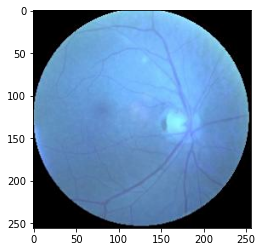

In [11]:
plt.imshow(img)
plt.show()

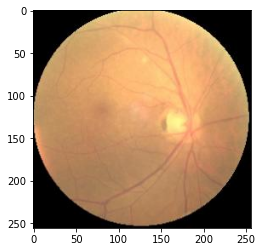

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
for image_class in os.listdir('data/'):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with the image {}'.format(image_path))

# 3. Load Data

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 4217 files belonging to 4 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [17]:
batch

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [18]:
len(batch)

2

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
# class 0 = cataract
# class 1 = diabetic_retinopathy
# class 2 = glaucoma
# class 3 = normal

batch[1]

array([2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 3, 2, 1, 1, 3, 1, 3, 3,
       3, 1, 3, 3, 0, 1, 2, 0, 2, 1])

In [21]:
data.class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

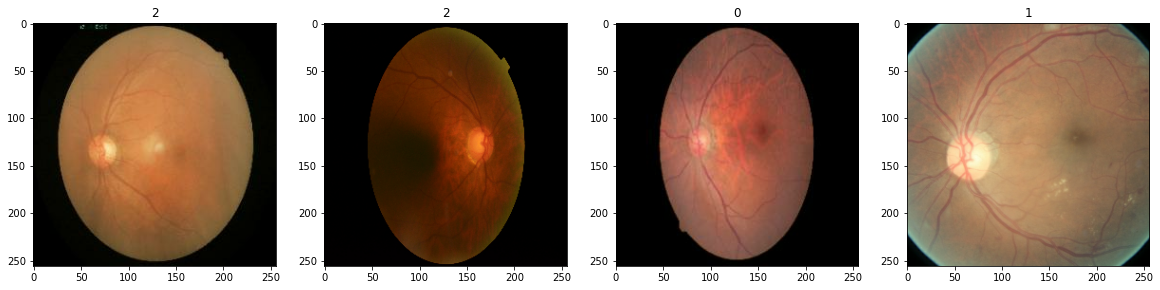

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [23]:
batch[0].min()

0.0

In [24]:
batch[0].max()

255.0

In [25]:
scaled = batch[0]/255

In [26]:
scaled.max()

1.0

In [27]:
data = data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [28]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [29]:
data.as_numpy_iterator().next()[0].min()

0.0

In [30]:
data.as_numpy_iterator().next()[0].max()

1.0

# 5. Split Data

In [31]:
len(data)

132

In [32]:
train_size = int(len(data)*0.7)+1
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [33]:
train_size, val_size, test_size

(93, 26, 13)

In [34]:
93+26+13

132

In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [71]:
model = Sequential()

In [72]:
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [73]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 64)      

# 7. Train

In [45]:
logdir = 'logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
93/93 [==============================] - 91s 963ms/step - loss: 1.2527 - accuracy: 0.3874 - val_loss: 0.9599 - val_accuracy: 0.5829
Epoch 2/20
93/93 [==============================] - 79s 834ms/step - loss: 0.9255 - accuracy: 0.5494 - val_loss: 0.8102 - val_accuracy: 0.5950
Epoch 3/20
93/93 [==============================] - 79s 831ms/step - loss: 0.8263 - accuracy: 0.5817 - val_loss: 0.7570 - val_accuracy: 0.5998
Epoch 4/20
93/93 [==============================] - 78s 830ms/step - loss: 0.7921 - accuracy: 0.6075 - val_loss: 0.7753 - val_accuracy: 0.5865
Epoch 5/20
93/93 [==============================] - 79s 838ms/step - loss: 0.7805 - accuracy: 0.6015 - val_loss: 0.7410 - val_accuracy: 0.5745
Epoch 6/20
93/93 [==============================] - 83s 877ms/step - loss: 0.7469 - accuracy: 0.6250 - val_loss: 0.7049 - val_accuracy: 0.7428
Epoch 7/20
93/93 [==============================] - 80s 847ms/step - loss: 0.7022 - accuracy: 0.6690 - val_loss: 0.6437 - val_accuracy: 0.7200

In [78]:
hist

In [79]:
hist.history

{'loss': [1.252718210220337,
  0.9254949688911438,
  0.8263179063796997,
  0.7921252250671387,
  0.7805363535881042,
  0.7468926906585693,
  0.7021674513816833,
  0.6762027740478516,
  0.6421265602111816,
  0.6485096216201782,
  0.6221449375152588,
  0.614246666431427,
  0.5928106904029846,
  0.566687285900116,
  0.550387978553772,
  0.5153272747993469,
  0.5266318321228027,
  0.48339077830314636,
  0.4818182587623596,
  0.45843997597694397],
 'accuracy': [0.3874327838420868,
  0.5493951439857483,
  0.5816532373428345,
  0.6075268983840942,
  0.6014785170555115,
  0.625,
  0.6690188050270081,
  0.6871639490127563,
  0.6995967626571655,
  0.6969085931777954,
  0.7247983813285828,
  0.727150559425354,
  0.7382392287254333,
  0.7644489407539368,
  0.7557123899459839,
  0.7715053558349609,
  0.7762096524238586,
  0.7923387289047241,
  0.7940188050270081,
  0.7943548560142517],
 'val_loss': [0.9599349498748779,
  0.8101622462272644,
  0.7569735646247864,
  0.7752654552459717,
  0.7410068511

# 8. Plot Performance

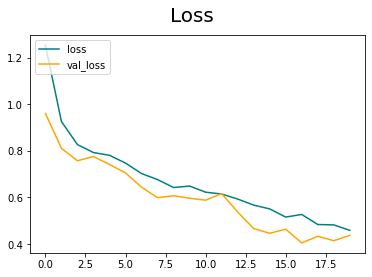

In [80]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

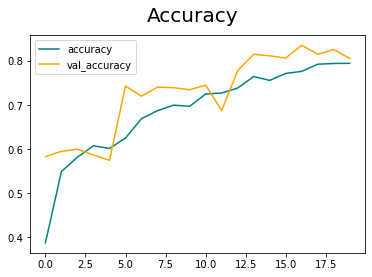

In [81]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [82]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [83]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [84]:
len(test)

13

In [140]:
yhat=[]
y_true = []

for batch in test.as_numpy_iterator():
    X, y = batch
    y_true = y_true + y.tolist()
    yhat = yhat+[np.argmax(element) for element in model.predict(X)]

1/1 [==============================] - 0s 130ms/step


In [141]:
y_pred = np.array(yhat)
y_test = np.array(y_true)

In [142]:
y_pred.shape

(409,)

In [144]:
y_test.shape

(409,)

In [145]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.58      0.66       109
           1       1.00      0.99      0.99        97
           2       0.79      0.58      0.67       107
           3       0.61      0.98      0.75        96

    accuracy                           0.77       409
   macro avg       0.80      0.78      0.77       409
weighted avg       0.80      0.77      0.76       409



# 10. Test

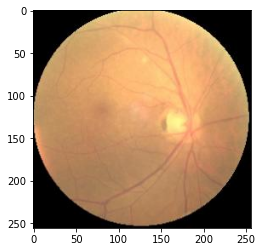

In [146]:
img = cv2.imread(os.path.join('data','cataract','_10_3215668.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

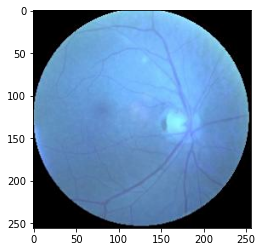

In [147]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [148]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 35ms/step


In [149]:
yhat

array([[8.0168068e-01, 7.9067695e-09, 1.9831723e-01, 2.1122255e-06]],
      dtype=float32)

In [150]:
np.argmax(yhat)

0

In [152]:
prediction = {0:'cataract',1:'diabetic_retinopathy',2:'glaucoma',3:'normal'}

In [154]:
prediction[np.argmax(yhat)]

'cataract'

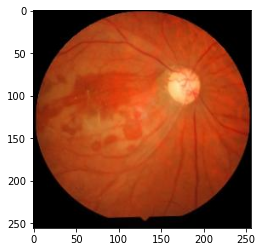

In [157]:
img = cv2.imread(os.path.join('data','glaucoma','_0_4517448.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

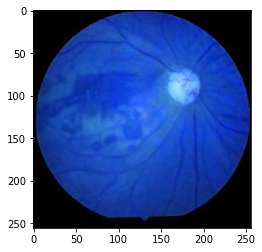

In [158]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [159]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 34ms/step


In [160]:
yhat

array([[7.2447062e-01, 6.0421476e-06, 2.7521428e-01, 3.0908370e-04]],
      dtype=float32)

In [161]:
prediction[np.argmax(yhat)]

'cataract'

# 11. Save the Model

In [3]:
from tensorflow.keras.models import load_model

In [163]:
model.save(os.path.join('models','Eye_disease.h5'))

In [164]:
new_model = load_model(os.path.join('models','Eye_disease.h5'))

In [165]:
new_model

In [166]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 64)      

# 3. Load Data

In [48]:
data = tf.keras.utils.image_dataset_from_directory('data',image_size=(224, 224))

Found 4217 files belonging to 4 classes.


In [49]:
data_iterator = data.as_numpy_iterator()

In [50]:
batch = data_iterator.next()

In [51]:
batch

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [52]:
len(batch)

2

In [53]:
batch[0].shape

(32, 224, 224, 3)

In [54]:
# class 0 = cataract
# class 1 = diabetic_retinopathy
# class 2 = glaucoma
# class 3 = normal

batch[1]

array([3, 2, 2, 3, 1, 3, 2, 1, 0, 0, 3, 2, 1, 0, 2, 3, 0, 3, 2, 0, 1, 1,
       3, 2, 1, 0, 3, 1, 0, 3, 2, 0])

In [55]:
data.class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

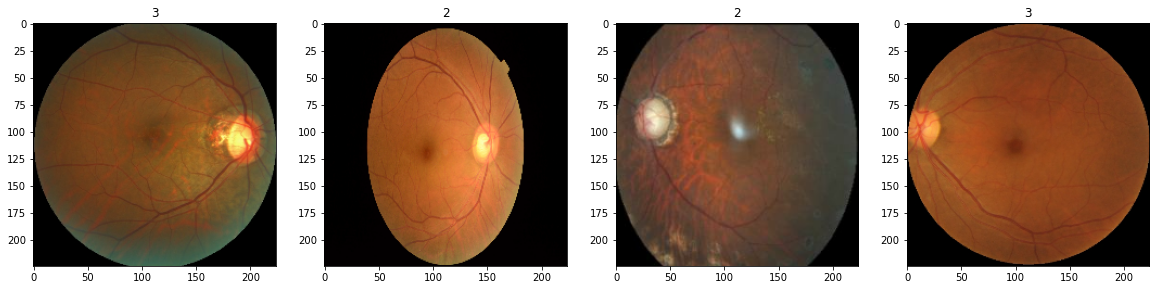

In [56]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [57]:
batch[0].min()

0.0

In [58]:
batch[0].max()

255.0

In [59]:
scaled = batch[0]/255

In [60]:
scaled.max()

1.0

In [61]:
data = data.map(lambda x,y:(x/255,y))

In [62]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [63]:
data.as_numpy_iterator().next()[0].min()

0.0

In [64]:
data.as_numpy_iterator().next()[0].max()

1.0

# 5. Split Data

In [65]:
len(data)

132

In [66]:
train_size = int(len(data)*0.7)+1
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [67]:
train_size, val_size, test_size

(93, 26, 13)

In [68]:
93+26+13

132

In [69]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Transfer Learning

In [70]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [71]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [72]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [73]:
os.listdir('data/')

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [74]:
from keras.layers import Input, Lambda, Dense, Flatten

In [75]:
# useful for getting number of classes
folders = os.listdir('data/')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [76]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
93/93 [==============================] - 474s 5s/step - loss: 0.6931 - accuracy: 0.7214 - val_loss: 0.4672 - val_accuracy: 0.8137
Epoch 2/20
93/93 [==============================] - 422s 5s/step - loss: 0.3609 - accuracy: 0.8558 - val_loss: 0.3310 - val_accuracy: 0.8666
Epoch 3/20
93/93 [==============================] - 449s 5s/step - loss: 0.3059 - accuracy: 0.8817 - val_loss: 0.2923 - val_accuracy: 0.8810
Epoch 4/20
93/93 [==============================] - 415s 4s/step - loss: 0.2795 - accuracy: 0.8861 - val_loss: 0.3803 - val_accuracy: 0.8377
Epoch 5/20
93/93 [==============================] - 408s 4s/step - loss: 0.2497 - accuracy: 0.9009 - val_loss: 0.3212 - val_accuracy: 0.8786
Epoch 6/20
93/93 [==============================] - 433s 5s/step - loss: 0.2559 - accuracy: 0.8962 - val_loss: 0.2957 - val_accuracy: 0.8942
Epoch 7/20
93/93 [==============================] - 391s 4s/step - loss: 0.2200 - accuracy: 0.9089 - val_loss: 0.5069 - val_accuracy: 0.8389
Epoch 8/20
93

In [77]:
hist

In [78]:
hist.history

{'loss': [0.6930851936340332,
  0.3609439432621002,
  0.30587470531463623,
  0.27946212887763977,
  0.24967679381370544,
  0.25585243105888367,
  0.21995240449905396,
  0.22105251252651215,
  0.20915532112121582,
  0.20931482315063477,
  0.1735769659280777,
  0.17063675820827484,
  0.14771023392677307,
  0.14530546963214874,
  0.1370379477739334,
  0.13600541651248932,
  0.13227976858615875,
  0.15250365436077118,
  0.15657469630241394,
  0.10901539027690887],
 'accuracy': [0.7214381694793701,
  0.8558467626571655,
  0.8817204236984253,
  0.8860887289047241,
  0.9008736610412598,
  0.8961693644523621,
  0.9089381694793701,
  0.9086021780967712,
  0.9180107712745667,
  0.9200268983840942,
  0.9327957034111023,
  0.9301075339317322,
  0.9405242204666138,
  0.9465726017951965,
  0.9495967626571655,
  0.9479166865348816,
  0.9482526779174805,
  0.9411962628364563,
  0.9422042965888977,
  0.9590053558349609],
 'val_loss': [0.4671948552131653,
  0.3310476541519165,
  0.29232847690582275,
  0

# 8. Plot Performance

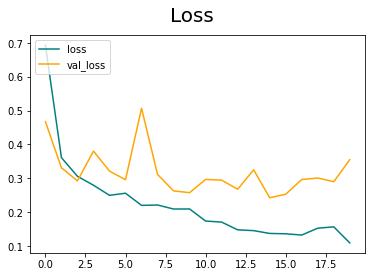

In [79]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

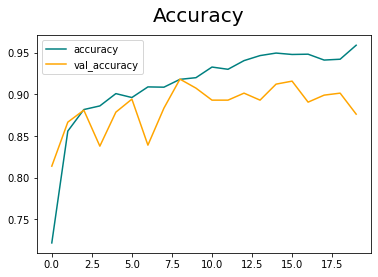

In [80]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [81]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [82]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [83]:
len(test)

13

In [84]:
yhat=[]
y_true = []

for batch in test.as_numpy_iterator():
    X, y = batch
    y_true = y_true + y.tolist()
    yhat = yhat+[np.argmax(element) for element in model.predict(X)]

1/1 [==============================] - 3s 3s/step


In [85]:
y_pred = np.array(yhat)
y_test = np.array(y_true)

In [86]:
y_pred.shape

(409,)

In [87]:
y_test.shape

(409,)

In [88]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       114
           1       0.99      1.00      0.99        93
           2       0.73      0.82      0.77        95
           3       0.94      0.70      0.80       107

    accuracy                           0.87       409
   macro avg       0.87      0.87      0.87       409
weighted avg       0.87      0.87      0.86       409



# 10. Test

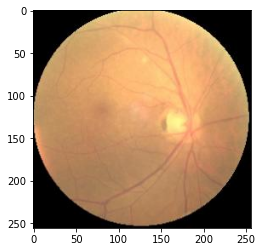

In [9]:
img = cv2.imread(os.path.join('data','cataract','_10_3215668.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

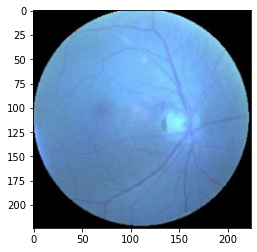

In [10]:
resize = tf.image.resize(img,(224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [94]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 120ms/step


In [95]:
yhat

array([[9.5695585e-01, 1.1647189e-04, 2.1304974e-02, 2.1622643e-02]],
      dtype=float32)

In [96]:
np.argmax(yhat)

0

In [97]:
prediction = {0:'cataract',1:'diabetic_retinopathy',2:'glaucoma',3:'normal'}

In [98]:
prediction[np.argmax(yhat)]

'cataract'

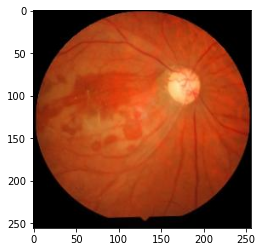

In [102]:
img = cv2.imread(os.path.join('data','glaucoma','_0_4517448.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

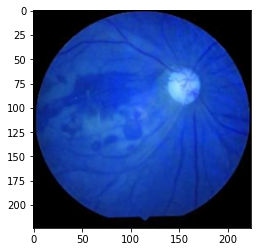

In [103]:
resize = tf.image.resize(img,(224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [104]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 128ms/step


In [105]:
yhat

array([[9.0381684e-05, 5.5312244e-03, 7.5453883e-01, 2.3983958e-01]],
      dtype=float32)

In [106]:
prediction[np.argmax(yhat)]

'glaucoma'

# 11. Save the Model

In [25]:
from tensorflow.keras.models import load_model

In [5]:
model.save(os.path.join('models','Eye_disease_TF.h5'))

NameError: name 'model' is not defined

In [26]:
new_model = load_model(os.path.join('models','Eye_disease_TF.h5'))

In [27]:
new_model

In [28]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

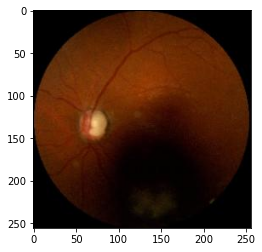

In [29]:
img = cv2.imread(os.path.join('data','glaucoma','_2_5194189.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

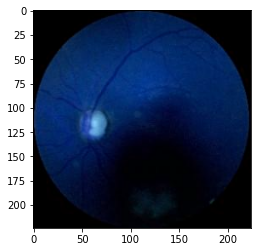

In [30]:
resize = tf.image.resize(img,(224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
yhat = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 220ms/step


In [32]:
yhat

array([[2.0812740e-04, 7.1847928e-05, 9.9698478e-01, 2.7352497e-03]],
      dtype=float32)

In [33]:
np.argmax(yhat)

2

In [34]:
prediction = {0:'cataract',1:'diabetic_retinopathy',2:'glaucoma',3:'normal'}

In [35]:
prediction[np.argmax(yhat)]

'glaucoma'